# Regresión Lineal

Datos de resistencia de probetas de hormigón:

[Vídeo demostrativo de ensayos por prensa hidráulica de muestras de hormigón](https://www.youtube.com/watch?v=TpsBsGf3vOs&list=WL&index=3)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
data = pd.read_csv("hormigon.csv")

In [3]:
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [4]:
descripcion = data.describe(include = "all").T
descripcion

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [5]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [6]:
descripcion["Nulos"] = data.isnull().sum()
descripcion["Tipos"] = data.dtypes

In [7]:
descripcion.head(len(data))

,count,mean,std,min,25%,50%,75%,max,Nulos,Tipos
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,0,float64
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,0,float64
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,0,float64
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,0,float64
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,0,float64
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,0,float64
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,0,float64
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,0,int64
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,0,float64


# Descripción gráfica de los datos

## Diagrama de correlación

In [8]:
data.corr()["strength"]

cement          0.497832
slag            0.134829
ash            -0.105755
water          -0.289633
superplastic    0.366079
coarseagg      -0.164935
fineagg        -0.167241
age             0.328873
strength        1.000000
Name: strength, dtype: float64

<Axes: >

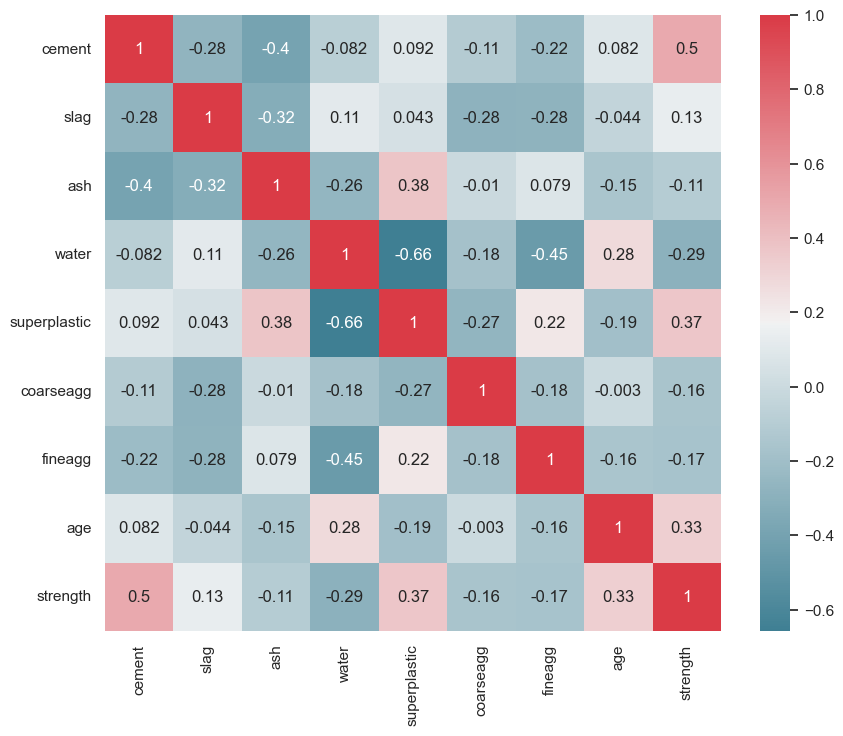

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,
            annot=True,
            mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,
            ax=ax)

El mismo diagrama de correlación pero sólo con los valores bajo la diagonal:

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<Axes: >

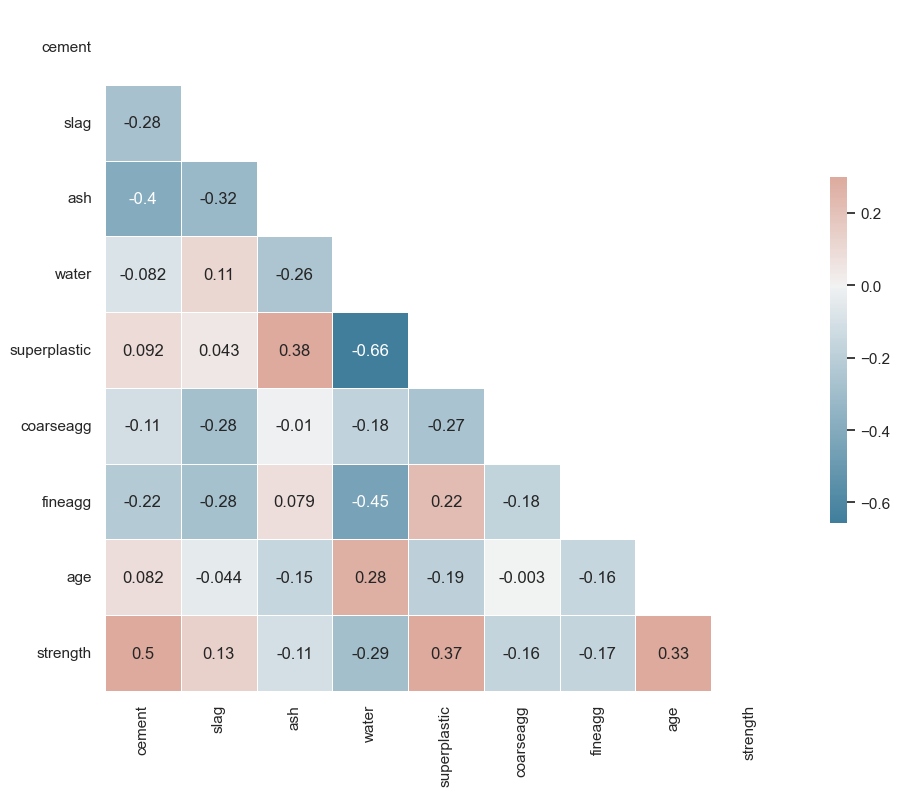

In [10]:
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Diagramas de pares

In [11]:
"""
data_num = data.select_dtypes(include=[np.number])
datoscompletos = data.dropna()
sns.pairplot(datoscompletos)
"""

'\ndata_num = data.select_dtypes(include=[np.number])\ndatoscompletos = data.dropna()\nsns.pairplot(datoscompletos)\n'

Detalle con tres columnas

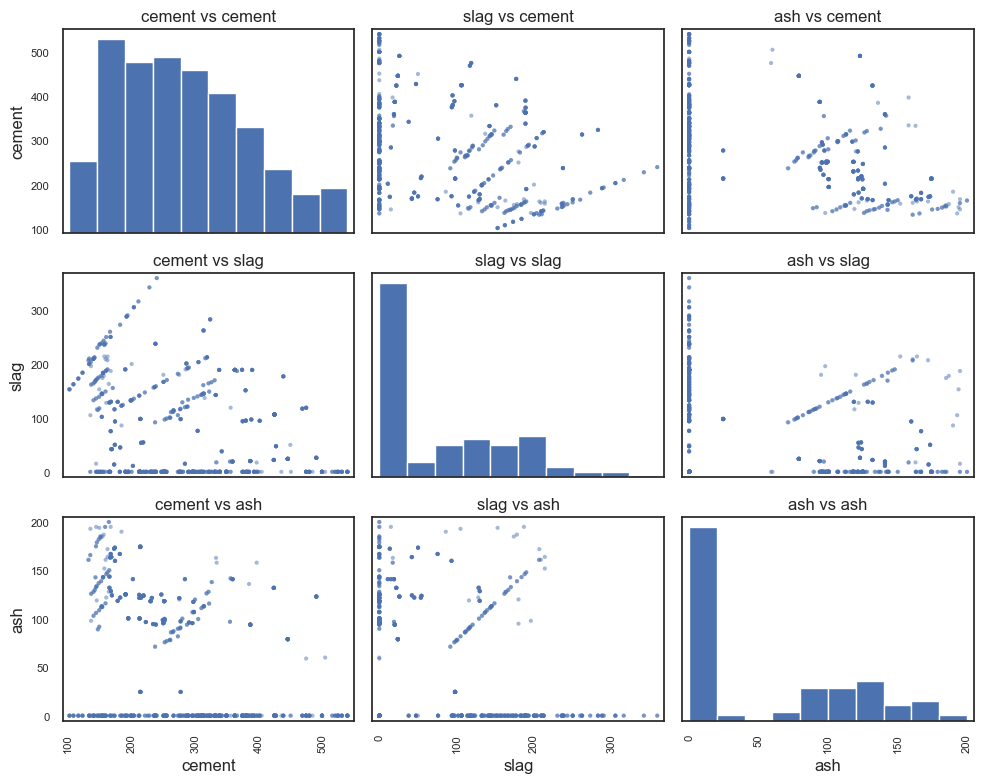

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# create a scatterplot matrix
pd.plotting.scatter_matrix(data[['cement', 'slag', 'ash']], figsize=(10, 8), diagonal='hist')

# add titles to the subplots
for ax in plt.gcf().axes:
    ax.set_title(ax.get_xlabel() + ' vs ' + ax.get_ylabel())

# adjust the layout and spacing between subplots
plt.tight_layout()

# display the plot
plt.show()


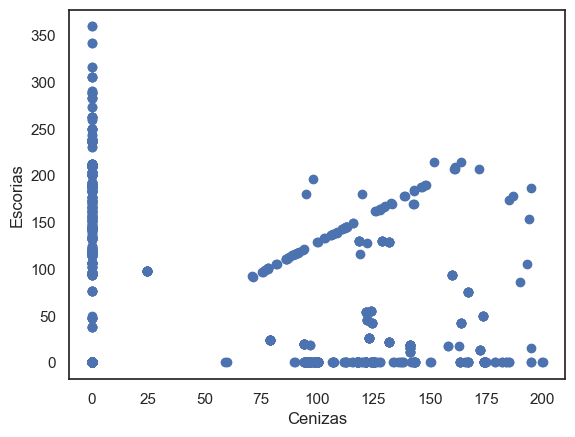

In [13]:
# Representación gráfica de un par de variables

plt.scatter(data["ash"], data['slag'])
plt.xlabel('Cenizas')
plt.ylabel('Escorias')
plt.show()

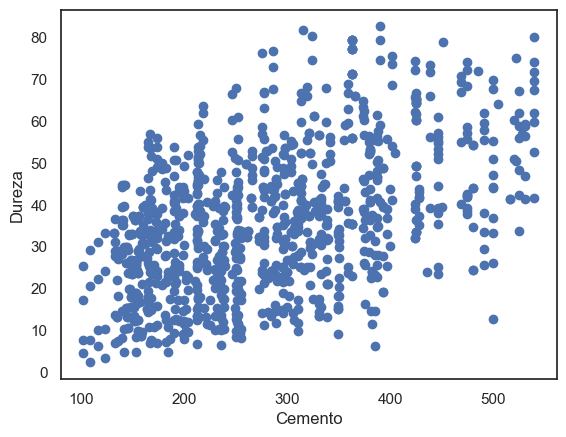

In [14]:
# Representación gráfica de un par de variables

plt.scatter(data["cement"], data['strength'])
plt.xlabel('Cemento')
plt.ylabel('Dureza')
plt.show()

# Regresión Lineal Univariante

Dado que la cantidad de cemento es la variable que arroja mayor correlación con la variable de estudio ("strength"), vamos a intentar realizar un análisis por regresión lineal univariante con esa variable.

In [15]:
# Separación de datos de entrenamiento y de test
from sklearn.model_selection import train_test_split
# Regresión lineal
from sklearn.linear_model import LinearRegression

In [16]:
# Seleccionar las variables de interés
X = data[['cement']]  # Variable independiente (cantidad de cemento) (el doble corchete es para que la salida sea un DataFrame)
y = data['strength']  # Variable dependiente (dureza)

In [17]:
type(X)

pandas.core.frame.DataFrame

In [18]:
type(y)

pandas.core.series.Series

## Separación train-test

- Una vez que comprobamos que los datos son correctos pasamos a la modelizacion, utilizando tecnicas de machine learning.
- Cuando realizamos un modelo predictivo es necesario conocer la fiabilidad esperada con datos futuros.
- Para ello podemos hacer una particion y utilizar unos datos para entrenar el modelo (train) y otros para comprobar la fiabilidad (test).

In [19]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
len(X_train)

824

In [21]:
len(X_test)

206

In [22]:
lista = list()
lista

[]

In [23]:
# Crear un modelo de regresión lineal
model = LinearRegression()

In [24]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_params_html',
 '_html_repr',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_params',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'n_jobs',


In [25]:
# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

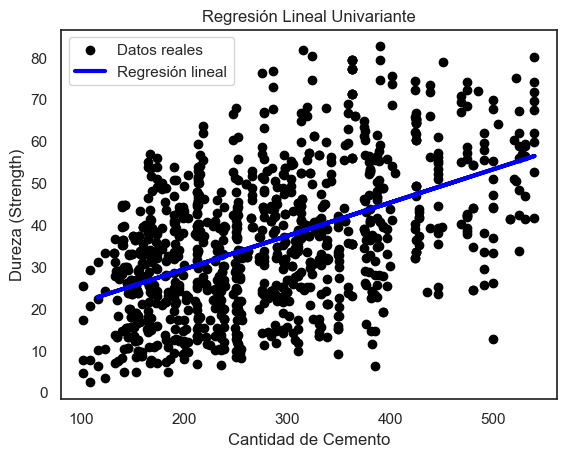

In [27]:
# Visualizar la regresión en un gráfico
plt.scatter(X, y, color='black', label='Datos reales')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regresión lineal')
plt.xlabel('Cantidad de Cemento')
plt.ylabel('Dureza (Strength)')
plt.title('Regresión Lineal Univariante')
plt.legend()
plt.show()

In [28]:
pd.DataFrame(list(zip(y_test, y_pred)), columns = ["y_test", "y_pred"])

,y_test,y_pred
0,39.29,51.262359
1,38.63,39.463051
2,43.57,26.773830
3,35.30,42.331435
4,39.44,32.558271
...,...,...
201,65.20,47.289528
202,72.10,47.210071
203,55.65,45.064743
204,51.96,37.134972


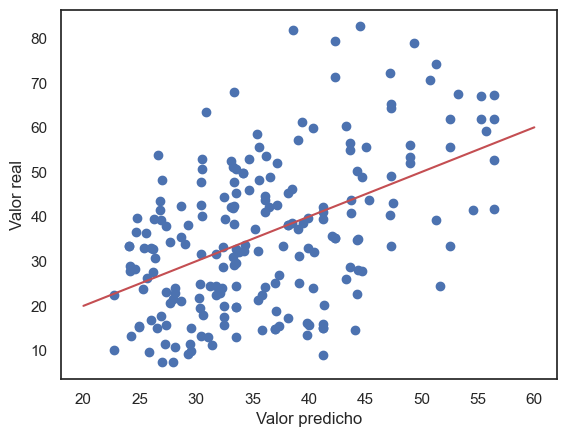

In [29]:
# Representación gráfica de la prediccion vs valor real
plt.scatter(y_pred, y_test)
plt.plot([20,60],[20,60], "r")
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')
plt.show()

## Métricas de rendimiento

https://scikit-learn.org/0.17/modules/classes.html#regression-metrics

In [30]:
# Funciones de error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [31]:
model.score(X_test, y_test)

0.24260571274565568

### R²
El coeficiente de determinación R² mide la proporción de la variabilidad en la variable dependiente que es explicada por el modelo. Su valor varía entre 0 y 1, y en algunos casos, puede ser negativo.

- **Mejor Posible Valor:**
  - El mejor valor posible de R² es 1.0. Esto indicaría que el modelo explica el 100% de la variabilidad en la variable dependiente, es decir, todas las observaciones caen exactamente en la línea de regresión.

- **Valor Nulo:**
  - Un R² de 0.0 indica que el modelo no explica ninguna variabilidad en la variable dependiente. Podría interpretarse como si el modelo es tan malo como un modelo constante que siempre predice el valor medio de la variable dependiente, sin importar los valores de las variables independientes.

- **Valor Negativo:**
  - En algunos casos, especialmente cuando se utilizan modelos muy malos, el R² puede ser negativo. Esto significa que el modelo es tan pobre que incluso un modelo constante sería mejor.

Entonces, si el modelo siempre predice el valor de y, el mejor valor posible de R² debería ser 1.0, ya que eso indicaría que el modelo explica el 100% de la variabilidad en la variable dependiente. Si el R² es 0.0, significa que el modelo no está proporcionando ninguna mejora sobre un modelo constante que siempre predice el valor medio de y. La interpretación es relativa al rendimiento del modelo en comparación con un modelo nulo o constante.

### Mean Squared Error (MSE):

- **Definición:**
  - El MSE es una medida de la magnitud cuadrática de los errores entre las predicciones de un modelo y los valores reales.

- **Interpretación:**
  - Cuanto menor sea el MSE, mejor. Indica que las predicciones del modelo están más cerca de los valores reales. Los errores más grandes tienen un impacto cuadrático en el MSE.

### Mean Absolute Error (MAE):

- **Definición:**
  - El MAE es una medida de la magnitud promedio de los errores absolutos entre las predicciones de un modelo y los valores reales.


- **Interpretación:**
  - Cuanto menor sea el MAE, mejor. Indica que las predicciones del modelo están más cerca de los valores reales. Los errores más grandes tienen un impacto lineal en el MAE.

### Diferencias

- **Sensibilidad a Outliers:**
  - El MSE penaliza más fuertemente los errores grandes debido al término cuadrático. Por lo tanto, es más sensible a outliers que el MAE.

- **Interpretación:**
  - Ambos indicadores miden la calidad de las predicciones, pero la elección entre MSE y MAE depende del énfasis en la sensibilidad a errores grandes y la robustez a outliers en el problema específico.

In [32]:
# Calcular métricas de rendimiento
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [33]:
# Imprimir las métricas de rendimiento
print(f'R al cuadrado (R²): {round(r2_score(y_test, y_pred), 4)} Objetivo --> 1')
print(f'Error Cuadrático Medio (Mean Squared Error MSE): {round(mean_squared_error(y_test, y_pred),2)} Objetivo --> 0')
print(f'Error Absoluto Medio (Mean Absolute Error MAE): {round(mean_absolute_error(y_test, y_pred), 2)} Objetivo --> 0')

R al cuadrado (R²): 0.2426 Objetivo --> 1
Error Cuadrático Medio (Mean Squared Error MSE): 216.72 Objetivo --> 0
Error Absoluto Medio (Mean Absolute Error MAE): 12.13 Objetivo --> 0


Hay que tener en cuenta que estas métricas (MAE y MSE) se expresan en las mismas unidades que la variable objetivo (en este caso, la variable `Y`).

# Regresión Lineal Multivariante

## Normalización

La siguiente celda de código es opcional. Ejecutarla sólo si se desea utilizar datos normalizados.

Para la regresión lineal NO ES NECESARIA LA NORMALIZACIÓN

En algunos casos, la normalización puede no ser necesaria. Si todas las variables predictoras están en la misma escala o si la escala no afecta significativamente la interpretación y el rendimiento del modelo, entonces normalizar los datos puede ser opcional.

La decisión dependerá de:

1. **Escalas de las variables:** La regresión lineal es sensible a la escala de las variables. Si las variables predictoras (características) están en escalas muy diferentes, el modelo puede dar más peso a las variables con valores más grandes. Normalizar (o estandarizar) los datos puede ayudar a evitar este problema.

2. **Interpretación de coeficientes:** Si la normalización no se realiza y las variables tienen diferentes escalas, la interpretación de los coeficientes del modelo puede volverse más complicada. Los coeficientes representarán el cambio en la variable de respuesta por unidad de cambio en la variable predictor, pero si las variables tienen escalas diferentes, este cambio puede no ser fácil de interpretar.

3. **Convergencia del algoritmo:** Algunos algoritmos de optimización utilizados en la regresión lineal pueden converger más rápidamente si los datos están normalizados. Esto es particularmente importante en algoritmos basados en el descenso de gradiente.


In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_sin_columnas = ss.fit_transform(data)
datos_normalizados = pd.DataFrame(data_sin_columnas, columns = data.columns)

Si no se desea usar datos normalizados ejecutar esta celda para recuperar los originales

Si se quiere usar los datos normalizados, comentar el código de la celda con `#`

In [35]:
# datos_normalizados = data.copy()

In [36]:
datos_normalizados.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,-4.139084e-16,1.000486,-1.715253,-0.850053,-0.079152,0.658961,2.477915
slag,1030.0,2.069542e-17,1.000486,-0.856888,-0.856888,-0.601778,0.800745,3.310675
ash,1030.0,-1.379695e-17,1.000486,-0.847144,-0.847144,-0.847144,1.002278,2.281084
water,1030.0,-1.345202e-16,1.000486,-2.800211,-0.780894,0.160829,0.488793,3.065647
superplastic,1030.0,-1.034771e-17,1.000486,-1.039143,-1.039143,0.032715,0.669131,4.353642
coarseagg,1030.0,6.984704e-16,1.000486,-2.212138,-0.526517,-0.063294,0.726761,2.214224
fineagg,1030.0,9.468154e-16,1.000486,-2.240917,-0.531970,0.073867,0.629166,2.733062
age,1030.0,5.518779e-17,1.000486,-0.707359,-0.612331,-0.279733,0.163731,5.057677
strength,1030.0,-4.484008e-17,1.000486,-2.005552,-0.725131,-0.082225,0.617874,2.801717


## Separación train-test

In [37]:
from sklearn.model_selection import train_test_split
y = datos_normalizados['strength']
X = datos_normalizados.drop('strength', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
# No es necesario ejecutar las importaciones si se han realizado antes.
# Son las mismas que con el modelo univariante
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Crear el modelo de regresión lineal
model = LinearRegression()

Ahora tomamos todas las columnas de la matriz X

In [40]:
# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

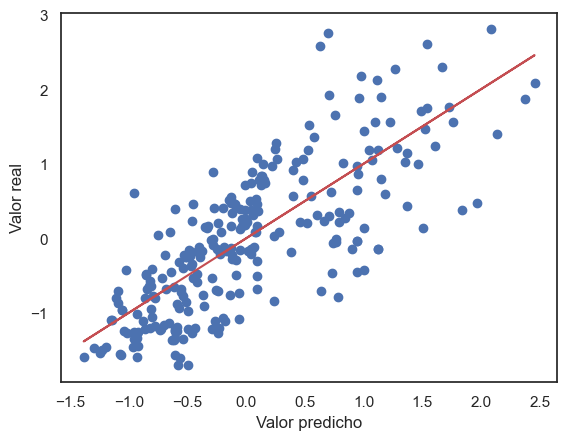

In [42]:
# Representación gráfica de la prediccion vs valor real
plt.scatter(y_pred, y_test)
plt.plot(y_pred,y_pred, "r")
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')
plt.show()

In [43]:
print(list(zip(y_test, y_pred)))

[(0.2079360214520087, np.float64(-0.2400720297676327)), (0.16840945487769104, np.float64(-0.03629425004667619)), (0.4642598168127368, np.float64(-0.09867066055270377)), (-0.031020040110913086, np.float64(0.9423708138917936)), (0.21691933203708086, np.float64(0.7929290615839832)), (-1.3491711466271803, np.float64(-0.9542333762050729)), (-1.540815105775388, np.float64(-1.248700426166522)), (0.9128264586940109, np.float64(0.401645581742514)), (-1.112610634553611, np.float64(-0.880364346471328)), (-0.9515099313946488, np.float64(-0.8104632226362101)), (0.13726731151610708, np.float64(1.5052588467141579)), (-0.411912408917976, np.float64(-0.8010665026062015)), (-0.6999772350126261, np.float64(-0.2534118272685362)), (-1.276705774574264, np.float64(-1.0146499627068937)), (-0.4837788935985541, np.float64(-0.41700091727469163)), (1.4602095170110796, np.float64(1.518903117375267)), (-0.15019862720620455, np.float64(0.04690577534935708)), (-1.4629597473714284, np.float64(-1.1972073601652358)), (-

In [44]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de rendimiento
print(f'R al cuadrado (R²): {round(r2_score(y_test, y_pred), 4)} Objetivo --> 1')
print(f'Error Cuadrático Medio (Mean Squared Error MSE): {round(mean_squared_error(y_test, y_pred), 2)} Objetivo --> 0')
print(f'Error Absoluto Medio (Mean Absolute Error MAE): {round(mean_absolute_error(y_test, y_pred), 2)} Objetivo --> 0')

R al cuadrado (R²): 0.5935 Objetivo --> 1
Error Cuadrático Medio (Mean Squared Error MSE): 0.39 Objetivo --> 0
Error Absoluto Medio (Mean Absolute Error MAE): 0.5 Objetivo --> 0


Recordemos que los valores obtenidos con la regresión univariante (usando sólo la columna cement) fueron:

- R al cuadrado $R^2$: 0.2426 Objetivo --> 1
- Error Cuadrático Medio (Mean Squared Error MSE): 216.72 Objetivo --> 0
- Error Absoluto Medio (Mean Absolute Error MAE): 12.13 Objetivo --> 0

El coeficiente de determinación también es calculable usando el modelo

In [45]:
model.score(X_test, y_test)

0.5934787013707554

## Interpretación del coeficiente de determinación $(R^2)$

Es la proporción de la variabilidad en la variable dependiente que es explicada por el modelo.

- **$R^2$ de 0.5935:** Indica que el modelo de regresión lineal multivariante explica alrededor del 59.35% de la variabilidad en la dureza del hormigón, según los datos de prueba.



## Parámetros del modelo

In [46]:
model.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

- `'copy_X'`: True, Evita que se modifique la matriz X
- `'fit_intercept'`: True, Con False obligamos a que la línea pase por el origen.
- `'n_jobs'`: None, *None means 1 job is used. If -1, all CPUs are used. In LinearRegression, this parameter is not used for computation, so it has no effect.*
- `'positive'`: False Con true obligamos a que la línea se mantenga en valores de y positivos

## Coeficientes de la combinación lineal de las variables del dataset


In [47]:
model.feature_names_in_

array(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'], dtype=object)

### coef_
**coef_**: matriz de coeficientes de longitud `nfeatures`, donde cada elemento es el coeficiente correspondiente al término de regresión para la característica de índice correspondiente.

In [48]:
print("Coeficientes: \n", model.coef_)

Coeficientes: 
 [ 0.78591498  0.56457752  0.35975594 -0.16775687  0.10533918  0.10243778
  0.12094367  0.43120688]


In [49]:
print("Ordenada en el origen: \n", model.intercept_)

Ordenada en el origen: 
 0.010090456924694732


### rank_
**rank_**: entero que indica el número de características únicas en el conjunto de datos utilizado para entrenar la regresión lineal.

Si el rango es menor que el número de columnas `model.n_features_in_`, significa que algunas características son linealmente dependientes (es decir, están correlacionadas). Esto puede causar problemas en la regresión, como coeficientes inestables o no significativos.

In [50]:
print("Rank: \n", model.rank_)

Rank: 
 8


In [51]:
model.n_features_in_

8

### singular_
**singular_**: matriz de números singulares que se utiliza para calcular el rango de la matriz de diseño (X). Esta matriz contiene los valores singulares de la matriz X.

Los valores singulares son los valores no nulos de la descomposición SVD (Descomposición en valores singulares) de X.

Estos valores se utilizan para calcular el rango de la matriz X y ayudan a determinar si hay características redundantes en el conjunto de datos.

In [52]:
print("Singular: \n", model.singular_)

Singular: 
 [41.9713191  33.3782864  32.56301903 28.04309793 27.26433953 24.6334381
 11.83411217  4.68641324]


Los valores singulares son útiles para evaluar la multicolinealidad en los datos.

- **Valores Singulares:**
  - Los valores singulares más pequeños indican mayor multicolinealidad entre las variables predictoras. Si hay un valor singular cercano a cero, sugiere que una columna (variable) en particular está altamente correlacionada con otra o con un conjunto de otras columnas.

- **Eliminación de Columnas:**
  - Si encuentras valores singulares muy pequeños, podrías considerar la posibilidad de eliminar la columna correspondiente de la matriz \(X\) para mejorar la multicolinealidad y, en consecuencia, mejorar el modelo.

- **Interpretación:**
  - En tu lista de valores singulares, los más pequeños son aproximadamente 4.686 y 11.834. Estos valores relativamente pequeños podrían sugerir cierta multicolinealidad entre las variables correspondientes.

- **Decisiones Prudentes:**
  - Antes de tomar decisiones sobre qué columnas eliminar, es recomendable realizar un análisis más detallado, como el cálculo de los factores de inflación de la varianza (VIF) para evaluar la multicolinealidad de manera más precisa.

Para obtener una perspectiva más completa y decidir qué columnas eliminar, vamos a calcular los VIF para cada variable y eliminar aquellas con VIF elevados.

El **Factor de Inflación de la Varianza (VIF, por sus siglas en inglés: Variance Inflation Factor)** es una medida utilizada en regresión lineal para detectar la multicolinealidad.
- El **VIF** mide cuánto la varianza de un coeficiente de regresión estimado aumenta debido a la multicolinealidad.
- Para cada variable independiente $X_j$, el VIF se calcula como:
        
    $VIF_j = (1)/(1-R_j^2)$
        
    $R_j^2$ es el coeficiente de determinación (R²) de la regresión de $X_j$ sobre las demás variables independientes.

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar el DataFrame con los VIF
print("VIF:\n", vif)

VIF:
        Variable       VIF
0        cement  7.488944
1          slag  7.276963
2           ash  6.170634
3         water  7.003957
4  superplastic  2.963776
5     coarseagg  5.074617
6       fineagg  7.005081
7           age  1.118367
        Variable       VIF
0        cement  7.488944
1          slag  7.276963
2           ash  6.170634
3         water  7.003957
4  superplastic  2.963776
5     coarseagg  5.074617
6       fineagg  7.005081
7           age  1.118367


Si encuentras columnas con VIF elevados (por encima de un umbral específico, como 20), podemos considerar eliminar esas columnas para mejorar la multicolinealidad y potencialmente mejorar el modelo de regresión. Ten en cuenta que eliminar variables debe hacerse con precaución y debe basarse en un entendimiento sustancial del dominio del problema.

Los resultados del VIF indican la presencia de multicolinealidad entre algunas de las variables predictoras. Aquí hay una interpretación básica:

- **Variables con VIF Alto:**
  - Las variables `water`, `coarseagg`, y `fineagg` tienen VIF significativamente altos (82.16, 84.96, y 72.79, respectivamente). Estos valores sugieren fuerte multicolinealidad entre estas variables y otras en el modelo.

- **Variables con VIF Moderado:**
  - La variable `cement` también tiene un VIF relativamente alto (15.46), lo que indica cierta multicolinealidad con otras variables en el modelo.

- **Variable con VIF Bajo:**
  - La variable `slag` tiene un VIF bajo (3.33), lo que sugiere una menor correlación con otras variables.

- **Decisión sobre Eliminación:**
  - En situaciones de multicolinealidad, generalmente se considera eliminar las variables con VIF alto para mejorar la estabilidad y la interpretación del modelo. En este caso, podrías considerar eliminar las variables `water`, `coarseagg`, y `fineagg` debido a sus VIF notoriamente altos.

Ten en cuenta que la decisión de eliminar variables debe basarse en un conocimiento sustancial del dominio y en el contexto del problema.

**También es importante equilibrar la reducción de multicolinealidad con la retención de variables importantes para la interpretación y la predicción del modelo.**

Después de realizar cambios, es recomendable volver a evaluar el modelo para ver cómo afectan los cambios a su rendimiento.

Podemos descomentar alguna o todas las líneas de esta celda y volver a la regresión lineal multivariante desde el paso "Separación train-test"

In [54]:
#datos_normalizados = datos_normalizados.drop(["water"], axis=1)
#datos_normalizados = datos_normalizados.drop(["coarseagg"], axis=1)
#datos_normalizados = datos_normalizados.drop(["fineagg"], axis=1)